In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

In [78]:
all_questions = pd.read_csv('/content/all_questions.csv')

In [97]:
all_questions.head()

,Вопрос,Эталонный ответ,Ответ студента,Оценка
0,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,"Бинарный поиск ищет элемент в массиве, деля ег...",10
1,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,Бинарный поиск — это когда массив делят попола...,8
2,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,Бинарный поиск — это поиск в отсортированном м...,7
3,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,"Бинарный поиск ищет элемент, деля массив. Псев...",5
4,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,"Это когда ищешь элемент в массиве, деля его по...",4


In [ ]:
quest_gemini = pd.read_csv('/content/questions_model_calc_gemini.csv', index_col='Unnamed: 0')
quest_gpt = pd.read_csv('/content/questions_model_calc_gpt.csv', index_col='Unnamed: 0')
quest_grok = pd.read_csv('/content/questions_model_calc_grok.csv', index_col='Unnamed: 0')
quest_deepseek = pd.read_csv('/content/questions_model_calc_deepseek_v3.csv', index_col='Unnamed: 0')

In [ ]:
result_questions = quest_gemini.copy()
result_questions['gpt4o_mini'] = quest_gpt['gpt4o_mini']
result_questions['grok_mini'] = quest_grok['grok3_mini']
result_questions['deepseek_v3'] = quest_deepseek['deepseek_v3']

In [ ]:
result_questions['grok_mini'] = np.where(result_questions['grok_mini'].isnull(), result_questions['Оценка'], result_questions['grok_mini'])
result_questions = result_questions.astype({'grok_mini': 'int64'})

In [ ]:
result_questions.head()

,Вопрос,Эталонный ответ,Ответ студента,Оценка,gemini_flash_score,gpt4o_mini,grok_mini,deepseek_v3
0,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,"Бинарный поиск ищет элемент в массиве, деля ег...",10,8,9,8,9
1,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,Бинарный поиск — это когда массив делят попола...,8,6,6,5,6
2,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,Бинарный поиск — это поиск в отсортированном м...,7,8,6,7,7
3,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,"Бинарный поиск ищет элемент, деля массив. Псев...",5,0,3,2,3
4,"Объясните, что такое бинарный поиск, и напишит...",Бинарный поиск — это алгоритм поиска элемента ...,"Это когда ищешь элемент в массиве, деля его по...",4,3,3,2,3


In [85]:
marks = result_questions[['Оценка', 'gemini_flash_score', 'gpt4o_mini', 'grok_mini', 'deepseek_v3']]
only_target_marks = marks['Оценка']

In [153]:
only_target_marks

,Оценка
0,10
1,8
2,7
3,5
4,4
...,...
437,4
438,3
439,2
440,1


In [ ]:
count_scores = marks.apply(pd.value_counts).fillna(0).astype(int)
count_scores

<ipython-input-10-eceab5561455>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_scores = marks.apply(pd.value_counts).fillna(0).astype(int)


,Оценка,gemini_flash_score,gpt4o_mini,grok_mini,deepseek_v3
0,0,69,1,20,0
1,82,22,25,71,16
2,43,118,134,127,121
3,45,62,87,47,103
4,45,33,49,47,40
5,40,8,38,22,42
6,43,33,28,13,43
7,45,28,28,38,22
8,41,36,30,36,41
9,15,19,20,19,14


In [94]:
count_target_scores = only_target_marks.value_counts()
count_target_scores

,count
Оценка,
1,82
7,45
3,45
4,45
2,43
10,43
6,43
8,41
5,40


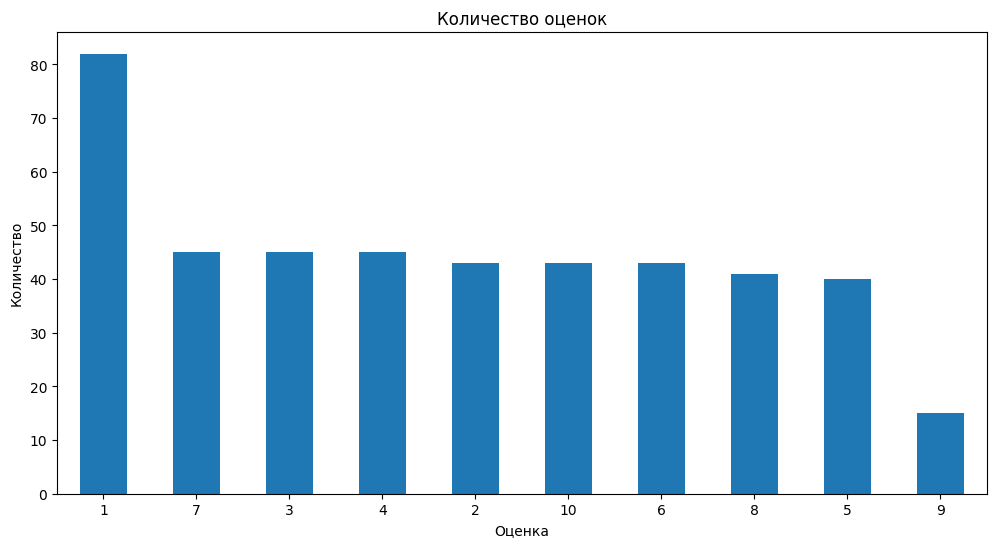

In [96]:
count_target_scores.plot(kind='bar', figsize=(12, 6))
plt.title('Количество оценок')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

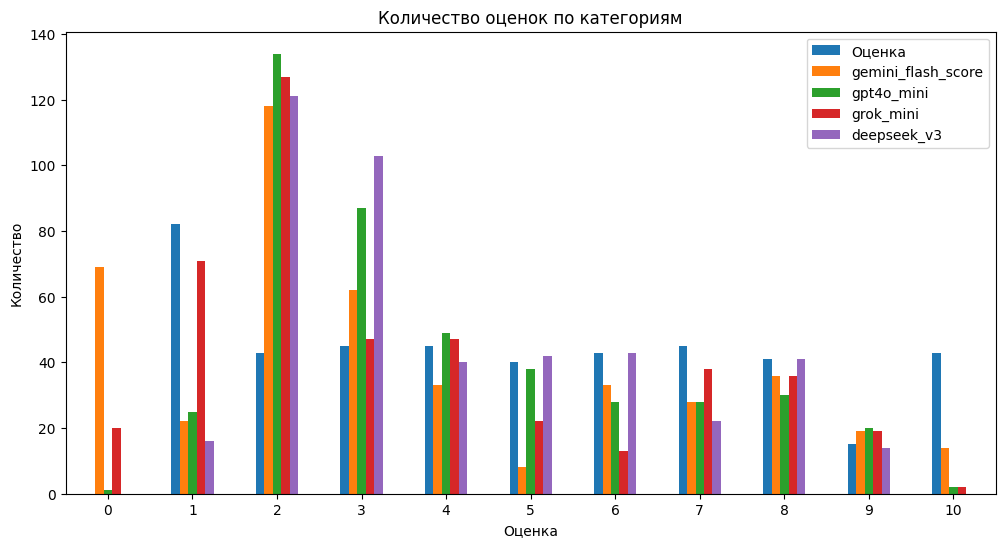

In [ ]:
count_scores.plot(kind='bar', figsize=(12, 6))
plt.title('Количество оценок по категориям')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

In [ ]:
marks['summ_mean'] = marks[['gemini_flash_score', 'gpt4o_mini', 'grok_mini', 'deepseek_v3']].mean(axis=1).round().astype(np.int64)

marks['gemini_diff'] = marks['gemini_flash_score'] - marks['Оценка']
marks['gpt_diff'] = marks['gpt4o_mini'] - marks['Оценка']
marks['grok_diff'] = marks['grok_mini'] - marks['Оценка']
marks['deepseek_diff'] = marks['deepseek_v3'] - marks['Оценка']
marks['summ_diff'] = marks['summ_mean'] - marks['Оценка']
marks

,Оценка,gemini_flash_score,gpt4o_mini,grok_mini,deepseek_v3,summ_mean,gemini_diff,gpt_diff,grok_diff,deepseek_diff,summ_diff
0,10,8,9,8,9,8,-2,-1,-2,-1,-2
1,8,6,6,5,6,6,-2,-2,-3,-2,-2
2,7,8,6,7,7,7,1,-1,0,0,0
3,5,0,3,2,3,2,-5,-2,-3,-2,-3
4,4,3,3,2,3,3,-1,-1,-2,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
437,4,2,2,2,3,2,-2,-2,-2,-1,-2
438,3,3,3,3,3,3,0,0,0,0,0
439,2,2,2,1,2,2,0,0,-1,0,0
440,1,2,2,1,2,2,1,1,0,1,1


In [ ]:
marks.mean()

,0
Оценка,4.861991
gemini_flash_score,3.640271
gpt4o_mini,3.945701
grok_mini,3.590498
deepseek_v3,4.079186
summ_mean,3.796380
gemini_diff,-1.221719
gpt_diff,-0.916290
grok_diff,-1.271493
deepseek_diff,-0.782805


In [ ]:
marks.corr().style.background_gradient(cmap='coolwarm')

,Оценка,gemini_flash_score,gpt4o_mini,grok_mini,deepseek_v3,summ_mean,gemini_diff,gpt_diff,grok_diff,deepseek_diff,summ_diff
Оценка,1.000000,0.851393,0.885352,0.884294,0.884978,0.881608,-0.294282,-0.651424,-0.469812,-0.694605,-0.541419
gemini_flash_score,0.851393,1.000000,0.948745,0.947595,0.949712,0.974049,0.250752,-0.236455,-0.031874,-0.288183,-0.062917
gpt4o_mini,0.885352,0.948745,1.000000,0.958952,0.965050,0.976097,0.094688,-0.223998,-0.083133,-0.334507,-0.130985
grok_mini,0.884294,0.947595,0.958952,1.000000,0.957613,0.975694,0.094546,-0.288768,-0.003262,-0.343815,-0.129470
deepseek_v3,0.884978,0.949712,0.965050,0.957613,1.000000,0.974805,0.097140,-0.280250,-0.084863,-0.279738,-0.132496
summ_mean,0.881608,0.974049,0.976097,0.975694,0.974805,1.000000,0.147703,-0.255157,-0.043463,-0.311715,-0.080500
gemini_diff,-0.294282,0.250752,0.094688,0.094546,0.097140,0.147703,1.000000,0.771413,0.808992,0.756853,0.884587
gpt_diff,-0.651424,-0.236455,-0.223998,-0.288768,-0.280250,-0.255157,0.771413,1.000000,0.849176,0.910175,0.921192
grok_diff,-0.469812,-0.031874,-0.083133,-0.003262,-0.084863,-0.043463,0.808992,0.849176,1.000000,0.837583,0.914752
deepseek_diff,-0.694605,-0.288183,-0.334507,-0.343815,-0.279738,-0.311715,0.756853,0.910175,0.837583,1.000000,0.911635


In [35]:
!pip install nltk textblob textstat spacy gensim pyldavis scikit-learn pandas numpy
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 49.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [48]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import textstat
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import re

# Инициализация NLP-модели (spaCy)
nlp = spacy.load("ru_core_news_sm")

# Загрузка стоп-слов и дополнительных ресурсов NLTK
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
stop_words = set(stopwords.words('russian'))

def extract_text_features(text, input_type):
    # Токенизация
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    doc = nlp(text)

    # Базовые статистики
    num_chars = len(text)
    num_words = len(words)
    num_sentences = len(sentences)
    avg_word_length = np.mean([len(word) for word in words]) if num_words > 0 else 0
    avg_sentence_length = np.mean([len(sent.split()) for sent in sentences]) if num_sentences > 0 else 0

    # Частотные характеристики
    unique_words = set(words)
    num_unique_words = len(unique_words)
    lexical_diversity = num_unique_words / num_words if num_words > 0 else 0
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    stopword_ratio = stopword_count / num_words if num_words > 0 else 0

    # Сложность текста
    flesch_reading_ease = textstat.flesch_reading_ease(text)
    smog_index = textstat.smog_index(text)
    flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
    coleman_liau_index = textstat.coleman_liau_index(text)

    # Части речи (POS-теги)
    pos_tags = nltk.pos_tag(words)
    pos_counts = Counter(tag for word, tag in pos_tags)
    noun_count = pos_counts.get('NN', 0) + pos_counts.get('NNS', 0) + pos_counts.get('NNP', 0) + pos_counts.get('NNPS', 0)
    verb_count = pos_counts.get('VB', 0) + pos_counts.get('VBD', 0) + pos_counts.get('VBG', 0) + pos_counts.get('VBN', 0) + pos_counts.get('VBP', 0) + pos_counts.get('VBZ', 0)
    adj_count = pos_counts.get('JJ', 0) + pos_counts.get('JJR', 0) + pos_counts.get('JJS', 0)
    adv_count = pos_counts.get('RB', 0) + pos_counts.get('RBR', 0) + pos_counts.get('RBS', 0)

    # Эмоциональные и тональные признаки
    sentiment = TextBlob(text).sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity

    # Именованные сущности (NER)
    ner_entities = [ent.label_ for ent in doc.ents]
    ner_counts = Counter(ner_entities)
    num_persons = ner_counts.get('PERSON', 0)
    num_orgs = ner_counts.get('ORG', 0)
    num_locations = ner_counts.get('GPE', 0) + ner_counts.get('LOC', 0)

    # Синтаксические признаки
    dependency_tree_depth = max([len(list(token.ancestors)) for token in doc]) if len(doc) > 0 else 0

    # Формальные и стилистические признаки
    uppercase_ratio = sum(1 for word in words if word.isupper()) / num_words if num_words > 0 else 0
    digit_count = sum(1 for word in words if word.isdigit())
    punct_count = sum(1 for char in text if char in '.,;:!?')

    # TF-IDF и тематические признаки (упрощённо)
    tfidf_vectorizer = TfidfVectorizer(max_features=5)
    try:
        tfidf_scores = tfidf_vectorizer.fit_transform([text]).toarray()[0]
        tfidf_top_words = tfidf_vectorizer.get_feature_names_out()
    except:
        tfidf_scores = np.zeros(10)
        tfidf_top_words = []

    # Собираем все признаки в словарь
    features = {
        # Базовые
        f'num_chars_{input_type}': num_chars,
        f'num_words_{input_type}': num_words,
        f'num_sentences_{input_type}': num_sentences,
        f'avg_word_length_{input_type}': avg_word_length,
        f'avg_sentence_length_{input_type}': avg_sentence_length,

        # Частотные
        f'num_unique_words_{input_type}': num_unique_words,
        f'lexical_diversity_{input_type}': lexical_diversity,
        f'stopword_count_{input_type}': stopword_count,
        f'stopword_ratio_{input_type}': stopword_ratio,

        # Сложность
        f'flesch_reading_ease_{input_type}': flesch_reading_ease,
        f'smog_index_{input_type}': smog_index,
        f'flesch_kincaid_grade_{input_type}': flesch_kincaid_grade,
        f'coleman_liau_index_{input_type}': coleman_liau_index,

        # Части речи
        f'noun_count_{input_type}': noun_count,
        f'verb_count_{input_type}': verb_count,
        f'adj_count_{input_type}': adj_count,
        f'adv_count_{input_type}': adv_count,

        # Тональность
        f'polarity_{input_type}': polarity,
        f'subjectivity_{input_type}': subjectivity,

        # NER
        f'num_persons_{input_type}': num_persons,
        f'num_orgs_{input_type}': num_orgs,
        f'num_locations_{input_type}': num_locations,

        # Синтаксис
        f'dependency_tree_depth_{input_type}': dependency_tree_depth,

        # Стиль
        f'uppercase_ratio_{input_type}': uppercase_ratio,
        f'digit_count_{input_type}': digit_count,
        f'punct_count_{input_type}': punct_count,

        # TF-IDF (первые 10 слов)
        **{f'tfidf_{i}_{input_type}': tfidf_scores[i] for i in range(len(tfidf_scores))}
    }

    return features

# Пример использования
text = """
тут еще такой момент, надо получше привязку сделать. Короче если ничего не выбрано, то типа отображать ничего не надо. а когда выбраны сущности, то рисуем только то, что есть у сущностей Германия а затем Максим
"""

features = extract_text_features(text, 'question')
df_features = pd.DataFrame([features])
print(df_features.T)  # Вывод в виде таблицы

                                         0
num_chars_question              212.000000
num_words_question               41.000000
num_sentences_question            3.000000
avg_word_length_question          4.292683
avg_sentence_length_question     11.666667
num_unique_words_question        31.000000
lexical_diversity_question        0.756098
stopword_count_question          20.000000
stopword_ratio_question           0.487805
flesch_reading_ease_question    110.393333
smog_index_question               3.129100
flesch_kincaid_grade_question     0.760000
coleman_liau_index_question       9.834286
noun_count_question              30.000000
verb_count_question               2.000000
adj_count_question                3.000000
adv_count_question                0.000000
polarity_question                 0.000000
subjectivity_question             0.000000
num_persons_question              0.000000
num_orgs_question                 0.000000
num_locations_question            1.000000
dependency_

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [72]:
converted_table = pd.DataFrame()
for row, column in tqdm(result_questions.iterrows()):
    features_question = extract_text_features(column['Вопрос'], 'question')
    feateure_reference_answer = extract_text_features(column['Эталонный ответ'], 'reference_answer')
    feature_student_answer = extract_text_features(column['Ответ студента'], 'student_answer')

    df_features_question = pd.DataFrame([features_question])
    df_features_reference_answer = pd.DataFrame([feateure_reference_answer])
    df_features_student_answer = pd.DataFrame([feature_student_answer])

    pre_table = pd.concat([df_features_question, df_features_reference_answer, df_features_student_answer], axis=1)
    converted_table = pd.concat([converted_table, pre_table])

converted_table = converted_table.reset_index(drop=True)
converted_table.head(10)

0it [00:00, ?it/s]

,num_chars_question,num_words_question,num_sentences_question,avg_word_length_question,avg_sentence_length_question,num_unique_words_question,lexical_diversity_question,stopword_count_question,stopword_ratio_question,flesch_reading_ease_question,...,num_locations_student_answer,dependency_tree_depth_student_answer,uppercase_ratio_student_answer,digit_count_student_answer,punct_count_student_answer,tfidf_0_student_answer,tfidf_1_student_answer,tfidf_2_student_answer,tfidf_3_student_answer,tfidf_4_student_answer
0,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,5,0.000000,5,9,0.784465,0.196116,0.196116,0.392232,0.392232
1,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,6,0.000000,1,8,0.366508,0.244339,0.366508,0.366508,0.733017
2,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,4,0.033333,0,6,0.301511,0.301511,0.301511,0.603023,0.603023
3,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,4,0.000000,0,6,0.301511,0.301511,0.301511,0.603023,0.603023
4,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,3,0.000000,0,2,0.447214,0.447214,0.447214,0.447214,0.447214
5,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,3,0.000000,0,4,0.447214,0.447214,0.447214,0.447214,0.447214
6,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,4,0.000000,0,4,0.447214,0.447214,0.447214,0.447214,0.447214
7,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,2,0.000000,0,2,0.353553,0.353553,0.353553,0.353553,0.707107
8,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,2,0.000000,0,1,0.447214,0.447214,0.447214,0.447214,0.447214
9,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0,5,0.000000,2,8,0.426401,0.426401,0.639602,0.213201,0.426401


from matplotlib import pyplot as plt
_df_4['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['num_chars_question']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'num_chars_question'}, axis=1)
              .sort_values('num_chars_question', ascending=True))
  xs = counted['num_chars_question']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('num_chars_question', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_chars_question')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['num_words_question']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'num_words_question'}, axis=1)
              .sort_values('num_words_question', ascending=True))
  xs = counted['num_words_question']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('num_words_question', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_words_question')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['num_sentences_question']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'num_sentences_question'}, axis=1)
              .sort_values('num_sentences_question', ascending=True))
  xs = counted['num_sentences_question']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('num_sentences_question', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_sentences_question')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [98]:
res_table = pd.concat([converted_table, marks], axis=1)
res_table.head()

,num_chars_question,num_words_question,num_sentences_question,avg_word_length_question,avg_sentence_length_question,num_unique_words_question,lexical_diversity_question,stopword_count_question,stopword_ratio_question,flesch_reading_ease_question,...,tfidf_0_student_answer,tfidf_1_student_answer,tfidf_2_student_answer,tfidf_3_student_answer,tfidf_4_student_answer,Оценка,gemini_flash_score,gpt4o_mini,grok_mini,deepseek_v3
0,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0.784465,0.196116,0.196116,0.392232,0.392232,10,8,9,8,9
1,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0.366508,0.244339,0.366508,0.366508,0.733017,8,6,6,5,6
2,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0.301511,0.301511,0.301511,0.603023,0.603023,7,8,6,7,7
3,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0.301511,0.301511,0.301511,0.603023,0.603023,5,0,3,2,3
4,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.07,...,0.447214,0.447214,0.447214,0.447214,0.447214,4,3,3,2,3


In [75]:
res_table.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [99]:
from sklearn.model_selection import train_test_split

In [103]:
res_table_X = res_table.drop(columns=['Оценка'])
res_table_y = np.array(res_table['Оценка'])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(res_table_X, res_table_y, test_size=0.3, random_state=42)

In [106]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [108]:
from catboost import CatBoostRegressor, cv, Pool

from collections import defaultdict

from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline

In [127]:
cb_reg_1 = CatBoostRegressor(task_type='CPU', random_seed=13, verbose=200)

In [138]:
test_data = Pool(data=X_test, label=y_test)
cb_reg_1.fit(X_train, y_train, eval_set=test_data)
cb_preds = cb_reg_1.predict(X_test)

evals_result = cb_reg_1.get_evals_result()
train_loss = evals_result['learn']['RMSE']
test_loss = evals_result['validation']['RMSE']

Learning rate set to 0.042347
0:	learn: 2.8411991	test: 2.8920160	best: 2.8920160 (0)	total: 9.37ms	remaining: 9.36s
200:	learn: 0.5776409	test: 1.1245146	best: 1.1237397 (198)	total: 1.28s	remaining: 5.1s
400:	learn: 0.3117092	test: 1.1251507	best: 1.1202533 (278)	total: 1.93s	remaining: 2.88s
600:	learn: 0.1939329	test: 1.1301554	best: 1.1202533 (278)	total: 2.57s	remaining: 1.71s
800:	learn: 0.1248220	test: 1.1323077	best: 1.1202533 (278)	total: 3.28s	remaining: 814ms
999:	learn: 0.0850577	test: 1.1307421	best: 1.1202533 (278)	total: 4.93s	remaining: 0us

bestTest = 1.120253288
bestIteration = 278

Shrink model to first 279 iterations.


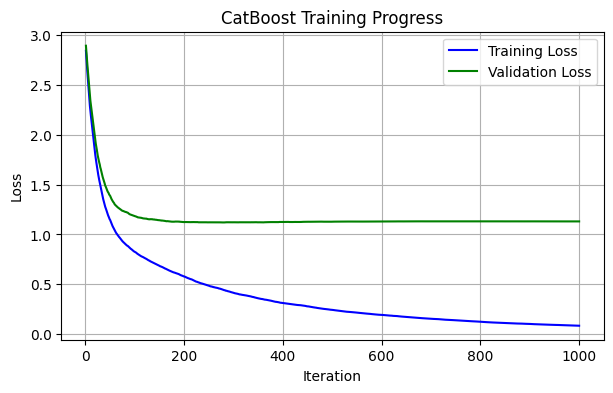

In [139]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

In [152]:
mean_squared_error(cb_preds, y_test)

1.254967428260476

In [120]:
mean_squared_error(np.array(X_test['deepseek_v3']), y_test)

2.593984962406015

In [122]:
mean_squared_error(np.array(X_test['gemini_flash_score']), y_test)

4.81203007518797

In [123]:
mean_squared_error(np.array(X_test['gpt4o_mini']), y_test)

2.81203007518797

In [124]:
mean_squared_error(np.array(X_test['grok_mini']), y_test)

3.6842105263157894

In [143]:
compare_df = pd.DataFrame({'deepseek_v3': [mean_squared_error(np.array(X_test['deepseek_v3']), y_test)],
                           'gemini_flash': mean_squared_error(np.array(X_test['gemini_flash_score']), y_test),
                           'gpt4o_mini': mean_squared_error(np.array(X_test['gpt4o_mini']), y_test),
                           'grok_mini': mean_squared_error(np.array(X_test['grok_mini']), y_test),
                           'mean': mean_squared_error(np.array(X_test['deepseek_v3'] + X_test['gemini_flash_score'] + X_test['gpt4o_mini'] + X_test['grok_mini']) / 4, y_test),
                           'regression': mean_squared_error(cb_preds, y_test)})

In [146]:
compare_df.T.rename(columns={0: 'MSE'})

,MSE
deepseek_v3,2.593985
gemini_flash,4.812030
gpt4o_mini,2.812030
grok_mini,3.684211
mean,3.099154
regression,1.254967


In [121]:
X_test

,num_chars_question,num_words_question,num_sentences_question,avg_word_length_question,avg_sentence_length_question,num_unique_words_question,lexical_diversity_question,stopword_count_question,stopword_ratio_question,flesch_reading_ease_question,...,punct_count_student_answer,tfidf_0_student_answer,tfidf_1_student_answer,tfidf_2_student_answer,tfidf_3_student_answer,tfidf_4_student_answer,gemini_flash_score,gpt4o_mini,grok_mini,deepseek_v3
287,65,11,1,5.090909,10.0,11,1.000000,3,0.272727,112.0850,...,2,0.447214,0.447214,0.447214,0.447214,0.447214,3,4,3,3
211,64,11,1,5.000000,10.0,11,1.000000,2,0.181818,112.0850,...,2,0.447214,0.447214,0.447214,0.447214,0.447214,2,2,2,3
72,63,11,2,5.000000,4.5,11,1.000000,2,0.181818,117.6675,...,1,0.447214,0.447214,0.447214,0.447214,0.447214,2,3,2,3
321,60,12,1,4.166667,11.0,12,1.000000,3,0.250000,111.0700,...,1,0.447214,0.447214,0.447214,0.447214,0.447214,0,1,1,2
73,63,11,2,5.000000,4.5,11,1.000000,2,0.181818,117.6675,...,1,0.447214,0.447214,0.447214,0.447214,0.447214,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,61,12,1,4.250000,11.0,12,1.000000,6,0.500000,111.0700,...,2,0.447214,0.447214,0.447214,0.447214,0.447214,4,3,3,3
26,91,17,2,4.705882,6.0,15,0.882353,5,0.294118,116.1450,...,1,0.447214,0.447214,0.447214,0.447214,0.447214,0,2,1,2
7,77,14,1,4.785714,11.0,13,0.928571,4,0.285714,111.0700,...,2,0.353553,0.353553,0.353553,0.353553,0.707107,0,2,1,2
401,52,10,1,4.400000,9.0,10,1.000000,5,0.500000,113.1000,...,1,0.447214,0.447214,0.447214,0.447214,0.447214,0,2,1,2


In [185]:
cb_preds_all = cb_reg_1.predict(res_table_X)
regress_df = pd.DataFrame({'Оценка': cb_preds_all.round().astype(int)}).value_counts().sort_index()
regress_df

,count
Оценка,
1,53
2,77
3,51
4,49
5,32
6,34
7,46
8,48
9,22


In [190]:
compare_table_scores = only_target_marks.copy()
compare_table_scores = compare_table_scores.value_counts().sort_index()
#pd.concat([compare_table_scores, regress_df], axis=1)
df = pd.DataFrame([np.array(compare_table_scores), np.array(regress_df)]).T.rename(columns={0: 'Оценка', 1: 'Регрессия'})
df.index = np.arange(1, len(df) + 1)
df

,Оценка,Регрессия
1,82,53
2,43,77
3,45,51
4,45,49
5,40,32
6,43,34
7,45,46
8,41,48
9,15,22
10,43,30


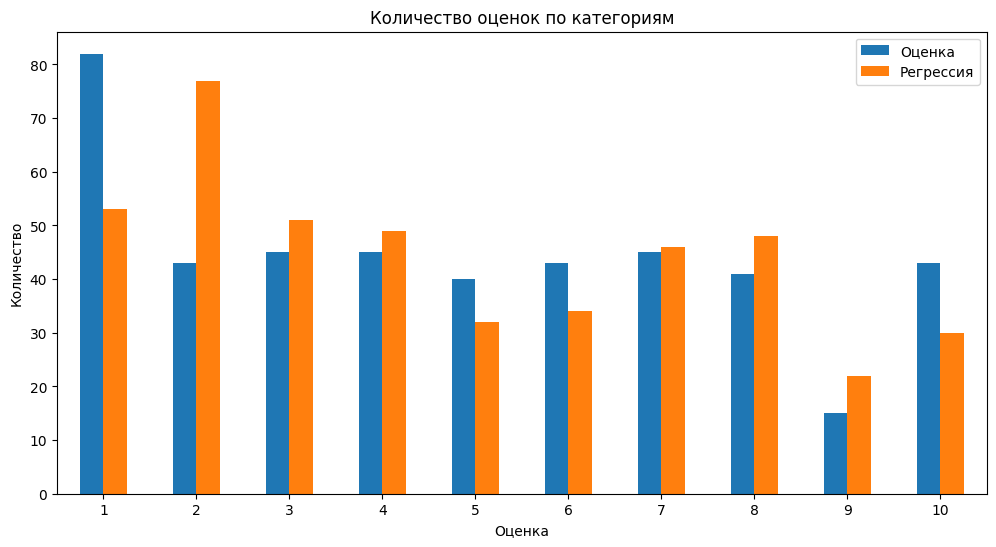

In [193]:
df.plot(kind='bar', figsize=(12, 6))
plt.title('Количество оценок по категориям')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()